Dataset Shape: (1143, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9

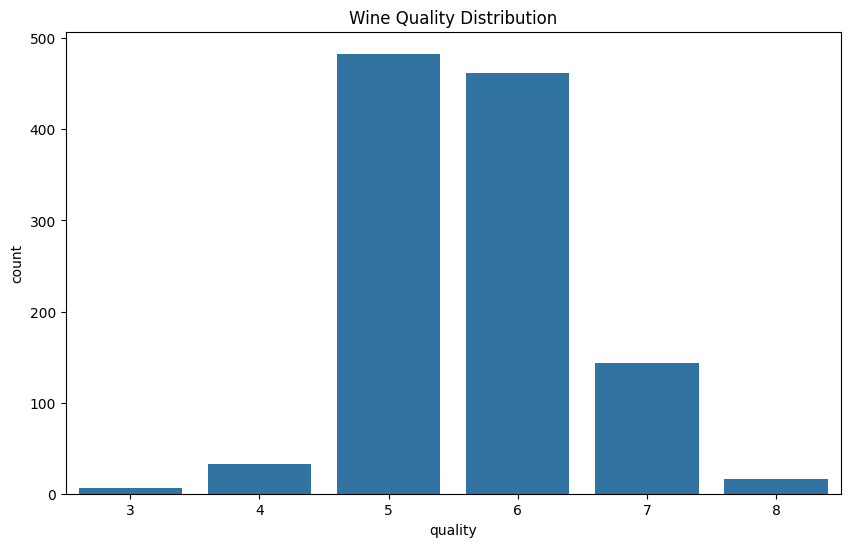

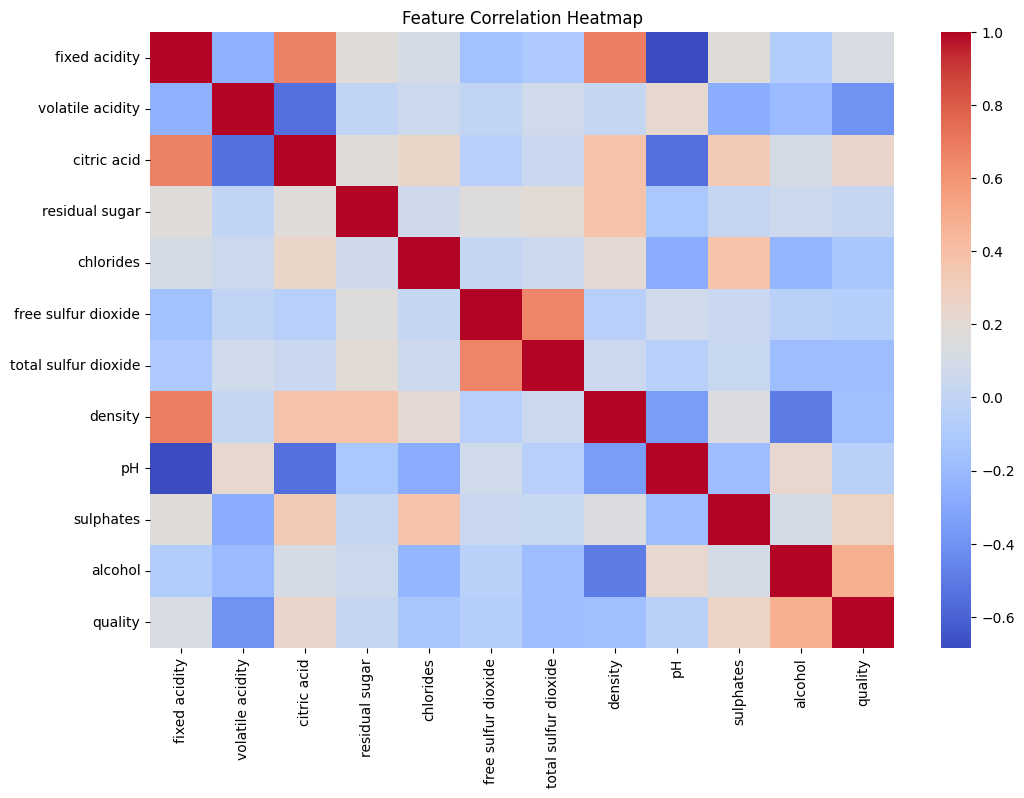


Random Forest Results
Accuracy: 0.9020979020979021
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       246
           1       0.69      0.55      0.61        40

    accuracy                           0.90       286
   macro avg       0.81      0.75      0.78       286
weighted avg       0.90      0.90      0.90       286


SGD Classifier Results
Accuracy: 0.8671328671328671
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       246
           1       0.62      0.12      0.21        40

    accuracy                           0.87       286
   macro avg       0.75      0.56      0.57       286
weighted avg       0.84      0.87      0.83       286


Support Vector Classifier Results
Accuracy: 0.8846153846153846
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       246
           1       0.68      0.33      0.44        40

    accuracy 

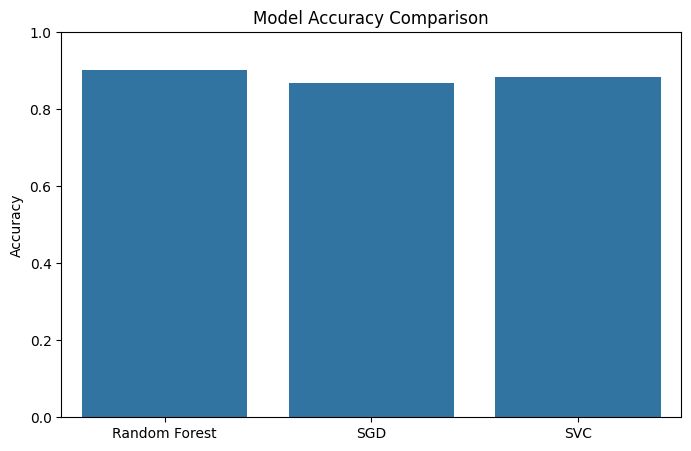

In [4]:
# ===============================
# Wine Quality Prediction
# Level 2 - Data Analytics Project
# ===============================

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# 2. Load dataset
df = pd.read_csv("WineQT.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# 3. Data Cleaning
df.drop(columns=['Id'], inplace=True)  # remove unnecessary column
print("\nMissing values:\n", df.isnull().sum())

# 4. Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Feature Engineering
# Convert quality to binary classification
# Good wine: quality >= 7, Bad wine: < 7
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 7. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Model Training

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SGD Classifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

# Support Vector Classifier
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# 9. Model Evaluation
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Results")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("SGD Classifier", y_test, sgd_pred)
evaluate_model("Support Vector Classifier", y_test, svc_pred)

# 10. Accuracy Comparison Plot
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, sgd_pred),
    accuracy_score(y_test, svc_pred)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()
